In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import sys
import time
import os
import random

# Pulsars
The first pulsar was discovered by chance by Jocelyn Bell in 1967, when she found periodic radiation pulses that repeated exactly every 1.3 seconds when she was doing her PhD studying distant galaxies. This pulses were called LGM-1, short for Little Green Men 1, implicating the idea that this could be, as improbable as it may seemed, an extraterrestrial signal of another civilization trying to make contact with Earth.

Once confirmed that it was not an extraterrestrial signal, nor it was caused by something/someone on earth the not identified object were called "pulsar", because of its pulsations.
![Radio emitions from pulsar](./img/pulseprofile.gif)

As can be seen in the image above, the pulsar period refers to the time elapsed between two pulses. For most of the discovered pulsars, a pulsar period of values around a second is typical, nevertheless there are pulsar whose pulsar period is in the range of miliseconds, also there have been discovered pulsar with pulsar periods of around 8 seconds.

As stated before, pulsars are detected via radio signals, these radio signals are present in different frequencies, in the same manner that white light is formed by light of all the colors of the spectrum. Observations conclude that the higher frequencies signals arrive slightly earlier than lower frequencys, this phenomena is known as **pulse dispersion**

## How are pulsars "born"?
It has been observed, for the nearing pulsars, that the lie in the remanence of a supernova. And the theory around them goes back to 1934, when Walter Baade and Fritz Zwicky predicted the existence of what they called **Neutron Stars**, which are stars that collapsed under their own gravitational field after a supernova explosion. A common way for a supernova to happen is when a star consumes all of its nuclear which leaves the star with no opportunity to overcome its own gravitational field, so its mass starts to fall into the center of the star until a point when it cannot whithstand it and an explosion occurs. Stars like our sun does not have enough mass to become a supernova, instead it will become a **white dwarf**. For a star to become a supernova, it has been observed that it must have at least a few times the mass of the sun, and even more massive starts will collapse into balck holes.

The first thoughts about neutron stars were that they were very dense, small, spinning at high velocities and with strong magnetic fields, also with radius of 10 km (like the size of a small city). charged particles moving across a magnetic field can cause beams of radiation being emmited from the magnetic poles of the star, and since the star is rotating around its axis, we can detect those sweeps of the radiation beams with a radio telescope as they pass across the direction of earth, which is in fact what Bell discovered.

![Pulsar model](./img/pulsar_model.gif)

so, as a general explanation for pulsar, we can conclude that they are neutron stars rotating at fast speeds around its own particular axis, with radiation beams going out of their magnetic poles. It is important to note though, that not all neutron stars are pulsar, or cannot be detected as such. Maybe the beams of a neutron star will never sweep through the direction of earth, maybe the process that creates those beams (which is not yet understood) is no longer possible.

The reason of a pulsar to rotate as such high speeds lies in the law of conservation of angular momentum. Stars tend to rotate at certain speed, and as the star becomes smaller in size, it starts to speed up its rotation velocity in order to conserve the angular momentum.

























## Detecting Pulsars from Radio Telescope images
Usually, radio telescope images come along with random noise from different sources, with lead with resulting images that are apparently of no use by their own, since that all random noise hides emissions from real pulsars, in other words, we might end up with images of given areas of the universe that appear to not have pulsars inside them when in fact there really are pulsars. The next example will serve to show this effect, in the first plot we have a gaussian distribution, which can be seen as a given signal from a particular source (such as the pulse in radio signals received by pulsars), as it really is. In the second one, we see the same gaussian distribution when some random noise is added to it, and it becomes clear that in many cases, in the presence of noise, the original signal cannot longer be distinguished.

In [ ]:
mean = 0; std = 1; variance = np.square(std)
x = np.arange(-3, 3, 0.01)
f = np.exp(-np.square(x-mean)/2*variance)/(np.sqrt(2*np.pi*variance))
plt.figure()
plt.title('Gaussian Distribution')
plt.plot(x, f)
plt.axis([-3, 3, 0, 4])

plt.figure()
plt.title('Gaussian Distribution with Random Noise')
plt.plot(x, f + 4 * np.random.rand(np.shape(f)[0]))
plt.axis([-3, 3, 0, 4])
plt.show()

As shown above, there is a main difficulty when analizing this kind of signals with a lot of random noise on them, astronomers have found ways to overcome this difficulties which allows them to find useful information where apparently there is none. A classic approach is known as **Image Stacking**, stacking consist on superposing all of the available images one above the others, with the intension of getting a new image that is product of this stacking, with most of the noise being cancelled, thus leaving us with a more accurate visualization of the real signal. The main idea is that the values of the noise will be cancelled during the stacking process, since all the noise is random.

There are various ways in which stacking is carried on:
* Sum Stacking
* Mean Stacking
* Median Stacking

Sum and Mean stacking follow the same logic, and hence the resulting image /
signal has the exact same form, with the only difference being that the
absolute values are different, because averaging in the end works as a scaling
operation. One reason to use averaging over sum is because the resulting values
when averaging will be in the same range as the original signals, whereas in
sum, the values will tend to grow in the same order of magnitude as signals
stacked.


The two plots below show a comparison between sum and average stacking. It can
be seen that both of them have the same form, but the values in the y axis are
different. it can be seen that after the stacking process, we now have a signal
shape much more similar to what the original looks like.


In [ ]:
sum_stack = np.zeros_like(f)
f_shape = np.shape(f)[0]
samples = 10000
for i in range(samples):
    sum_stack += f + 4 * np.random.rand(f_shape)

plt.figure(figsize=(8, 4))
plt.title('Sum Stacking')
plt.plot(x, sum_stack)

plt.figure(figsize=(8, 4))
plt.title('Average Stacking')
plt.plot(x, sum_stack / samples)
plt.show()


The other approach when doing image stacking is by taking the median of all the
values that are being processed. In many cases the median would work as a more
robust statistical parameter, since is less sensitive to outliers. But even
though median averaging looks as a better approach, it has some challenges to
be taken into account algorithm-wise.

The main challenge to take into account is the use of memory. Averaging do not
requires to allocate at the same time all the data set, since it is only adding
values, thus not requiring much memory. On the other hand, the computation of
the median requires to have all the data set allocated at the same time, to
sort it, and find the value that sits in the middle of the data set. This may
become heavy on resources if the size of images is big, or if we are trying to
process a huge amount of them. Algorithms to overcome such difficulty are:
* Quickselect
* Binmedian
* Binapprox
the three of them have a time complexity of O(n log n), the difference is that
the first two return as result the exact median, whereas binapprox returns an
aproximation of the median.

### Quickselect
The quick select algorithm is based in the popular sorting algorithm
**Quicksort**. Quickselect does not sorts explicitly the array of values, it
only divides the array around a pivot value, placing to the left of it values
that are smaller than the pivot, and to the right values that are bigger.


In [ ]:
def quickselect(array, med):
    """
    Finds the exact median in a numpy array of numbers.
    This only works with odd length arrays for now.
    Returns the exact median.
    """

    # arbitrary pivot value in the array
    pivot = array[med] if med < np.shape(array)[0] else array[-1]

    # arrays to store less than, equal, and greater than, values with respect
    # to the pivot value
    right   = array[array > pivot]
    left    = array[array < pivot]
    equal   = array[array == pivot]

    shape_left = np.shape(left)[0]
    shape_equal = np.shape(equal)[0]
    if med + 1 <= shape_left:
        return quickselect(left, med)
    elif med + 1 > shape_left + shape_equal:
        return quickselect(right, (med - shape_left - shape_equal))
    else:
        return pivot

test = np.arange(1, 181)
np.random.shuffle(test)
print(f"\n{quickselect(test, np.shape(test)[0] // 2)} is the median")

### Binmedian
Binmedian is another algorithm that computes the exact median of a data set,
the idea of this algorithm comes from the assumption that the median is at
most, one standard deviation away from the mean of the data set. The main steps
for binmedian are:
1. Compute the mean and standard deviation of the data set
2. Create `B` evenly spaced bins across `[mean - std, mean + std]`
3. Iterate through the data set and map points to the `B` bins, and also map
   points to a *left bin* which are smaller than `mean - std`
4. Count the number of data points in each bin
5. Find the bin that has the median inside of it, if the bin contains only one element, return, else, recurse

Here, B is a predefined constant, when B is big, less ammount of data points are found in the bins, but in contrast, more work is needed in the placement of values in bins as well as o determine which bin contains the median.

In [ ]:
def binmedian(array, mean, std, B=5):
     """
     Finds the median in a data set

     B is an arbitrary constant
     """

     # computing mean and std
     # mean = np.mean(array)
     # std = np.std(array)

     # index of median, sort of
     median_position = np.shape(array)[0] // 2

     # delta in boundaries of bins
     delta = 2 * std / B

     # counting number of points to the left of (mean - std)
     lower_bound = mean - std
     mask = array < lower_bound
     count = np.count_nonzero(mask)
     # print(f"array: {array}")
     # print(f"mean: {mean}, std: {std}")
     # print(f"left_bound: {lower_bound}, count: {count}")

     # iterating over bins, break if we already count more than the index of
     # median
     # print()
     for i in range(B):
         upper_bound = lower_bound + delta
         mask = (array >= lower_bound) & (array < upper_bound)
         count += np.count_nonzero(mask)
         # print(f"lower: {lower_bound}, upper: {upper_bound}, count: {count}")
         # print()
         if count >= median_position + 1:
             break
         lower_bound = upper_bound

     # assign new array, check if it has one element. Or recurssion is in order
     # new_arr = array[mask]
     new_arr = array
     # print(f"lower: {lower_bound}, upper: {upper_bound}")
     # print(f"new_array: {new_arr}")
     # input('\n\n')
     return new_arr[mask][0] if np.shape(new_arr[mask])[0] == 1 else \
         binmedian(new_arr, mean, mean - lower_bound, B=B)



test = np.arange(1, 1822)
np.random.shuffle(test)
print(f"true median: {np.median(test)}")
print(f"{binmedian(test, np.median(test), np.std(test))} is the median")

### Binapprox
Binapprox is a brother algorithm of binmedian, it is faster but on the
downside, it returns an approximation of the median, instead of the exact one.
The idea is still the same, one has to have `B` bins across
`[mean - std, mean + std]`, only this time we are just counting the number of
data points to the left of that stablished range, then start adding to that
count how many elements are in each bin, until we found the bin inside of which
the median must lie, and then, we just return the middle value of the bin, this
is `(lower_bound + upper_bound) / 2`. The pseudocode is as follows:
1. Compute mean and standard deviation
2. Create B evenly spaced bins across `[mean - std, mean + std]`
3. Count how many values are to the left (less than) of `mean - std`
4. Start iterating through bins, adding to count how many elements fit in that
   bin
5. When count is greater than the position of median, return the middle value
   of bin


In [ ]:
def binapprox(array, B=5):
    median_position = np.shape(array)[0] // 2
    mean = np.mean(array)
    std = np.std(array)
    delta = 2 * std / B
    lower_bound = mean - std
    mask = array < lower_bound
    count = np.count_nonzero(mask)

    for i in range(B):
        upper_bound = lower_bound + delta
        mask = (array >= lower_bound) & (array < upper_bound)
        count += np.count_nonzero(mask)
        if count >= median_position + 1:
            break
        lower_bound = upper_bound

    return (upper_bound + lower_bound) // 2

array = np.arange(1, 1 + 5001)
np.random.shuffle(array)
print(f"\n{binapprox(array, B=2)} is the median B: 2")
print(f"{binapprox(array, B=3)} is the median with B: 3")
print(f"{binapprox(array, B=5)} is the median with B: 5")
print(f"{binapprox(array, B=7)} is the median with B: 7")

print("\n\n")
print("Binapprox of huge array")
array = np.arange(1, 500002)
np.random.shuffle(array)
print(f"true median: {np.median(array)}")
print(f"{binapprox(array, B=8)} with B = 8")
print(f"{binapprox(array, B=64)} with B = 512")
print(f"{binapprox(array, B=8192)} with B = 8192")

From the examples above it can be seen that as we increase the number of bins
`B`, the solution for binapprox approaches asymptotically to the exact median,
without returning the exact solution, even for huge numbers `B`

### Time execution of the three methods
Comparing the execution times of the three methods for the huge array in the previous cell.

In [ ]:
array = np.arange(5000111)
np.random.shuffle(array)

start_quick = time.perf_counter()
quick = quickselect(array, np.shape(array)[0] // 2)
end_quick = time.perf_counter()

start_binmedian = time.perf_counter()
binmed = binmedian(array, np.mean(array), np.std(array), B=5)
end_binmedian = time.perf_counter()

start_binapprox = time.perf_counter()
binap = binapprox(array, B=5)
end_binapprox = time.perf_counter()

print("Results")
print(f"true median(numpy): {np.median(array)}")
print(f"quickselect returned: {quick}"
      + f" with an execution time: {end_quick - start_quick}")
print(f"binmedian returned: {binmed}"
      + f" with an execution time: {end_binmedian - start_binmedian}"
      + " with B: 5")
print(f"binapprox returned: {binap}"
      + f" with an execution time: {end_binapprox - start_binapprox}"
      + " with B: 5")

## Detecting pulsars in FITS images
The course provides a set of FITS images, in order for them to be stacked via
average stacking and median stacking. The median stacking is carried on with
the binapprox algorithm.

One prerequisite for stacking images is that each and everyone of the images
must be centered around the same point, in this case, the course staff have
centered the images around a particular pulsar, though it may not be visible in
every single image.

The course asks for two functions to perform median stacking algorithm, called
`median_bins_fits` and `median_approx_fits`.
* `median_bins_fits` returns the mean, standard deviation, the count of values
in the left bin (array for every point in the image) and the count of values in
each bin (array of size `[dim0_image, dim1_image, B]`)
*  `median_approx_fits`: returns the approximate median with the binapprox
algorithm

The mean stacking is perform as usual, the sum of each and every value divided
by the total ammount of values.

### Mean Stacking Function

In [2]:
def mean_fits(fits_files):
    """
    Computes the mean of a set of numpy arrays
    
    fits_files: list of names of fits files to open
    """
    for i, fits_ in enumerate(fits_files):
        fits_file = fits.open(fits_)
        file = fits_file[0].data
        if not i:
            res = np.zeros_like(file)
        res += file
        fits_file.close()

    return res / (i + 1)

In [3]:
############## COURSE STAFF SOLUTION ####################
def mean_fits_staff(files):
  n = len(files)
  if n > 0:
    
    hdulist = fits.open(files[0])
    data = hdulist[0].data
    hdulist.close()
    
    for i in range(1, n):
      hdulist = fits.open(files[i])
      data += hdulist[0].data
      hdulist.close()
    
    mean = data / n
    return mean

### Median Stacking Functions

In [17]:
def median_bins_fits(fits_files, B):
    """
    Utility function of 'median_approx_fits'.
    ...
    Parameters
    ----------
    fits_files: list
        List with filepaths of the images
    B: int
        Number of bins to perform binapprox
    
    Return
    ------
    (mean, std, left, bins): tuple
        mean - np.array of mean for every point of the fits images
        std - np.array of standard deviation for every point of the fits images
        left - np.array of how many values belong to the left bin
        bins - np.array of size [dim0, dim1, B] on how many values belong to 
                each bin
    """
    mean, std = running_stats(fits_files)
    for i, fits_ in enumerate(fits_files):
        fits_file = fits.open(fits_)
        file = fits_file[0].data
        if not i:
            left = np.zeros_like(file)
            bins = np.zeros(np.shape(file) + (B,))
        left += file < mean - std
        min_ = mean - std
        inc = 2 * std / B
        for b in range(B):
            max_ = min_ + inc
            bins[:, :, b] += (file >= min_) & (file < max_) 
            min_ = max_
            
        fits_file.close()
    
    return (mean, std, left, bins)
    

def median_approx_fits(fits_files, B):
    """
    Finds the approximate median for every point of the fits images
    ...
    Parameters
    ----------
    fits_files: list
        List with filepaths of the images
    B: int
        Number of bins to perform binapprox
    
    Return
    ------
    median_values: np.array with the approximate median for every point
        in the fits images
    """
    mean, std, left_bin, bins = median_bins_fits(fits_files, B)
    median_ammount = len(fits_files) // 2
    median_count = left_bin
    median_values = np.zeros_like(median_count)
    for b in range(B):
        median_count += bins[:, :, b]
        mask = median_count > median_ammount
        median_values[mask] = mean[mask] - std[mask] + (b + 0.5) * 2 / B * std[mask]
        median_count[mask] = -np.inf
 
    return median_values

In [18]:
############## COURSE STAFF SOLUTION ####################
def median_bins_fits_staff(filenames, B):
  # Calculate the mean and standard dev
  mean, std = running_stats(filenames)
    
  dim = mean.shape # Dimension of the FITS file arrays
    
  # Initialise bins
  left_bin = np.zeros(dim)
  bins = np.zeros((dim[0], dim[1], B))
  bin_width = 2 * std / B 

  # Loop over all FITS files
  for filename in filenames:
      hdulist = fits.open(filename)
      data = hdulist[0].data

      # Loop over every point in the 2D array
      for i in range(dim[0]):
        for j in range(dim[1]):
          value = data[i, j]
          mean_ = mean[i, j]
          std_ = std[i, j]

          if value < mean_ - std_:
            left_bin[i, j] += 1
                
          elif value >= mean_ - std_ and value < mean_ + std_:
            bin = int((value - (mean_ - std_))/bin_width[i, j])
            bins[i, j, bin] += 1

  return mean, std, left_bin, bins


def median_approx_fits_staff(filenames, B):
  mean, std, left_bin, bins = median_bins_fits_staff(filenames, B)
    
  dim = mean.shape # Dimension of the FITS file arrays
    
  # Position of the middle element over all files
  N = len(filenames)
  mid = (N + 1)/2
	
  bin_width = 2*std / B
  # Calculate the approximated median for each array element
  median = np.zeros(dim)   
  for i in range(dim[0]):
    for j in range(dim[1]):    
      count = left_bin[i, j]
      for b, bincount in enumerate(bins[i, j]):
        count += bincount
        if count >= mid:
          # Stop when the cumulative count exceeds the midpoint
          break
      median[i, j] = mean[i, j] - std[i, j] + bin_width[i, j]*(b + 0.5)
      
  return median

### Helper functions (provided by course staff)

In [21]:
def running_stats(filenames):
  '''Calculates the running mean and stdev for a list of FITS files using Welford's method.'''
  n = 0
  for filename in filenames:
    hdulist = fits.open(filename)
    data = hdulist[0].data
    if n == 0:
      mean = np.zeros_like(data)
      s = np.zeros_like(data)

    n += 1
    delta = data - mean
    mean += delta/n
    s += delta*(data - mean)
    hdulist.close()

  s /= n - 1
  np.sqrt(s, s)

  if n < 2:
    return mean, None
  else:
    return mean, s

## Processing images

In [22]:
###############################################################
# Dataset of 1000 fits images centered around a faint pulsar
###############################################################
path_to_img = os.path.join(".", "FITS", "1000_set")
name_files = os.listdir(path_to_img)
fits_files = [os.path.join(path_to_img, file) for file in
              name_files]

###############################################################
# Dataset of 7330 fits images centered around a faint pulsar
###############################################################
# path_to_img = os.path.join(".", "FITS", "7330_set")
# name_files = os.listdir(path_to_img)
# random.shuffle(name_files)
# fits_files = [os.path.join(path_to_img, file) for file in
#               name_files]

###############################################################
# Dataset of +9K fits images not centered around anything in
# particular. To see the effects of not centering
###############################################################
# path_to_img = os.path.join(".", "FITS", "random_set")
# name_files = os.listdir(path_to_img)
# random.shuffle(name_files)
# name_files = name_files[:8000]
# fits_files = [os.path.join(path_to_img, file) for file in
#               name_files]

In [ ]:
data  = mean_fits(fits_files)
median = median_approx_fits(fits_files, 15)

In [ ]:
random_fit = random.choice(fits_files)
random_fit = fits.open(random_fit)
rfit_data = random_fit[0].data
random_fit.close()

In [ ]:
cmap = plt.cm.viridis
size = 7
figsize = (3 * size, size)

fig, ax = plt.subplots(1, 3, figsize=figsize)
ax[0].set_title("Mean Stacking")
mean_fig = ax[0].imshow(data.T, cmap=cmap)
fig.colorbar(mean_fig, ax=ax[0])
ax[1].set_title("Median Stacking")
median_fig = ax[1].imshow(median.T, cmap=cmap)
fig.colorbar(median_fig, ax=ax[1])
ax[2].set_title("Random Image")
random_fig = ax[2].imshow(rfit_data.T, cmap=cmap)
fig.colorbar(random_fig, ax=ax[2])
for ax in fig.get_axes():
    ax.label_outer()
plt.savefig('/home/cardoso/garbage/img_tst_7330.png',
            bbox_inches='tight', pad_inches=0.05)

plt.show()

### Comparison between my own and staff's solutions

In [23]:
mean_own  = mean_fits(fits_files)
mean_staff = mean_fits_staff(fits_files)

In [25]:
median_own  = median_approx_fits(fits_files, 15)
median_staff = median_approx_fits_staff(fits_files, 15)

own time: 13.109041032000277
staff time: 90.19897194900022


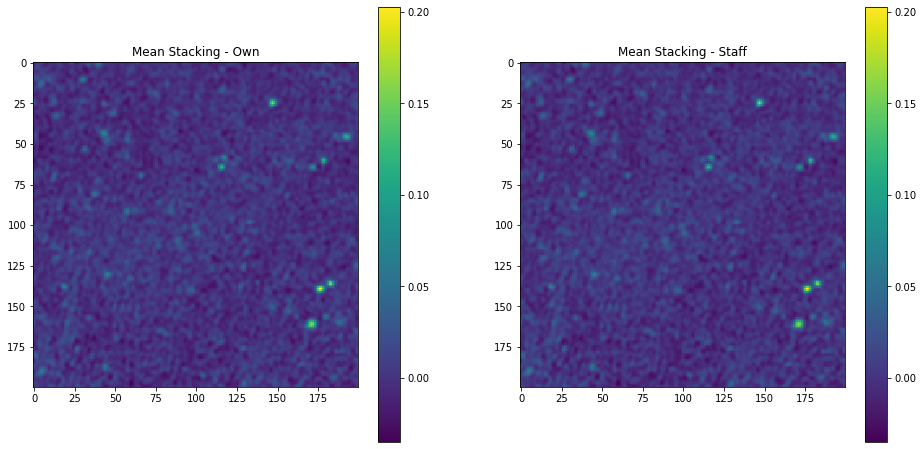

In [26]:
cmap = plt.cm.viridis
size = 8
figsize = (2 * size, size)

fig, ax = plt.subplots(1, 2, figsize=figsize)
ax[0].set_title("Mean Stacking - Own")
mean_fig = ax[0].imshow(mean_own.T, cmap=cmap)
fig.colorbar(mean_fig, ax=ax[0])
ax[1].set_title("Mean Stacking - Staff")
median_fig = ax[1].imshow(mean_staff.T, cmap=cmap)
fig.colorbar(median_fig, ax=ax[1])
for ax in fig.get_axes():
    ax.label_outer()
plt.savefig('/home/cardoso/garbage/img_tst_1000_comparison_mean.png',
            bbox_inches='tight', pad_inches=0.05)

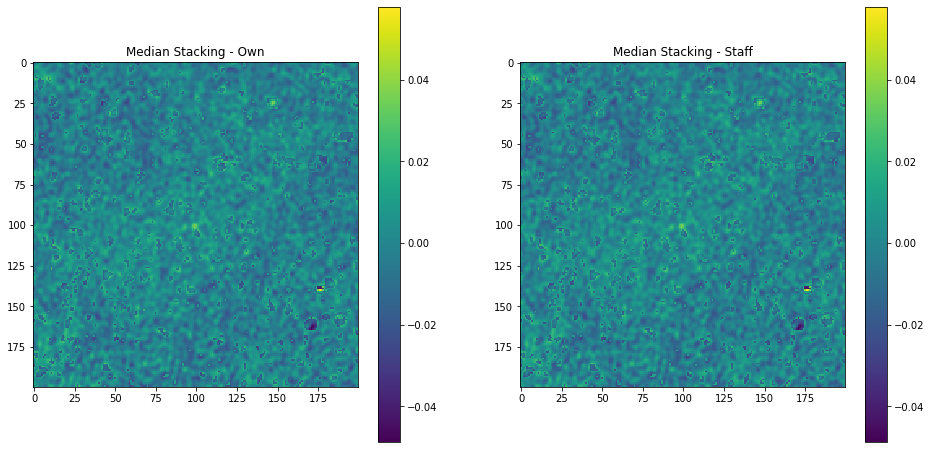

In [27]:
fig, ax = plt.subplots(1, 2, figsize=figsize)
ax[0].set_title("Median Stacking - Own")
median_own_fig = ax[0].imshow(median_own.T, cmap=cmap)
fig.colorbar(median_own_fig, ax=ax[0])
ax[1].set_title("Median Stacking - Staff")
median_staff_fig = ax[1].imshow(median_staff.T, cmap=cmap)
fig.colorbar(median_staff_fig, ax=ax[1])
for ax in fig.get_axes():
    ax.label_outer()
plt.savefig('/home/cardoso/garbage/img_tst_1000_comparison_median.png',
            bbox_inches='tight', pad_inches=0.05)

plt.show()

## Resources
* [An introduction to pulsars - Australia Telescope National Facility](https://www.atnf.csiro.au/outreach/education/everyone/pulsars/index.html)
* [What Is a Supernova? - NASA](https://www.nasa.gov/audience/forstudents/5-8/features/nasa-knows/what-is-a-supernova.html)
* [Fast computation of the Median by Succesive Binning](https://arxiv.org/abs/0806.3301)